<a href="https://colab.research.google.com/github/kimpyeong-an/digital/blob/main/ch04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as pit
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360, 3)


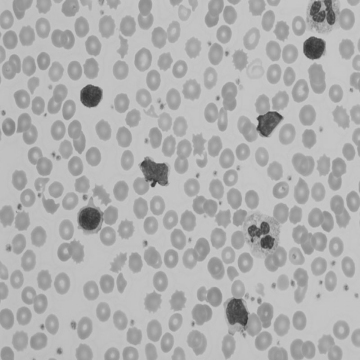

In [3]:
#img = cv2.imread('/content/gdrive/My Drive/di/Images/lena256.jpg')
#img = cv2.imread('/content/gdrive/My Drive/di/Images/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/di/Images/milkdrop.bmp')
img = cv2.imread('/content/gdrive/My Drive/di/Images/cell.bmp')
#img = cv2.imread('/content/gdrive/My Drive/di/Images/cell-bright.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#pit.imshow (gimg1, cmap= 'gray')
cv2_imshow(gimg1)

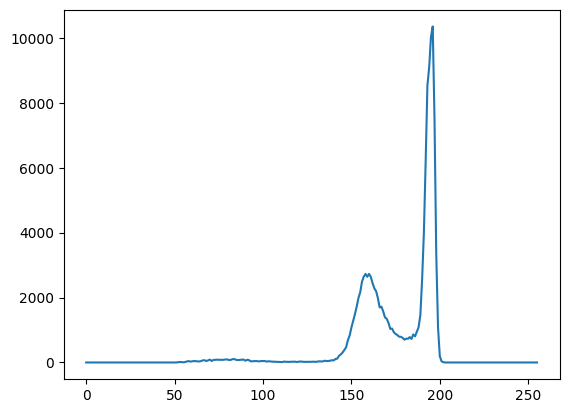

In [4]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0, 256])
pit.plot(hist)

In [5]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

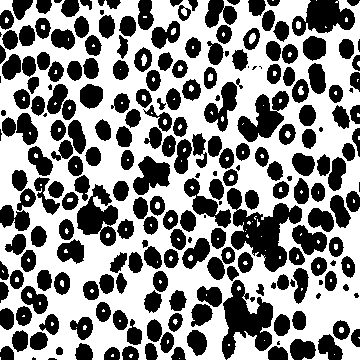

In [6]:
# 히스토그램 상 임계점은 180
Threshold = 180
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > Threshold:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

In [7]:
T1 = 128
T2 = 0
T0 = 1

In [8]:
def threshold__update(img, bImg):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if bImg[h, w] == 0:
        sum1 += np.int32(img[h, w])
        count1 += 1
      else:
        sum2 += np.int32(img[h, w])
        count2 += 1
  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1 + avg2)/2
  return T


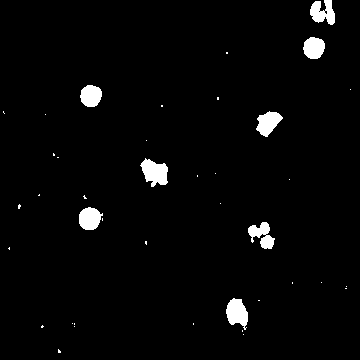

In [9]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > T1:
      gBin[h, w] = 0
    else:
      gBin[h, w] = 255

cv2_imshow(gBin)

96.49925540697988


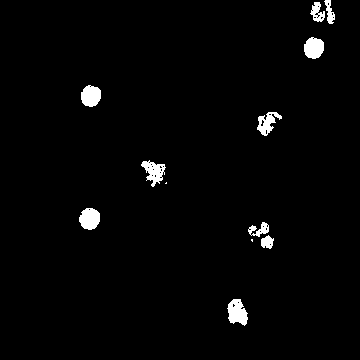

In [10]:
while True:
  T2 = threshold__update(gimg1, gBin)

  if(np.abs(T2 - T1) < T0):
    break
  T1 = T2
  for h in range(gimg1.shape[0]):
    for w in range(gimg1.shape[1]):
      if gimg1[h, w] > T1:
        gBin[h, w] = 0
      else:
        gBin[h, w] = 255

print(T2)
cv2_imshow(gBin)